In [ ]:
import nltk
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter= PorterStemmer
import math

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [ ]:
from nltk.corpus import gutenberg as gb

In [ ]:
gb.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
emma= gb.words('austen-emma.txt')
print(emma)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]


In [ ]:
all_words= list(map(str.lower, emma)) #Converting into the lower case words
print(all_words)
print(len(all_words))

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied'

In [ ]:
words_unique= set(all_words) # Listing the unique words
print(len(words_unique))

7344


In [ ]:
counts= [(w,all_words.count(w)) for w in words_unique] # Creating a word and its count

In [ ]:
counts[:10] # Printing first 10 rows if word and its count

[('beautiful', 24),
 ('wounded', 1),
 ('expectations', 4),
 ('shilling', 2),
 ('parents', 4),
 ('lot', 1),
 ('nay', 12),
 ('above', 12),
 ('unmentioned', 1),
 ('earn', 2)]

In [ ]:
freq_dict={}
for w,c in counts:
  freq_dict[w] =c

In [ ]:
# Rank can be evaluated by sorting the above list as well as using indices
# However that will be totally linear and will have unique rank for each word(even if same counts)

count_rank= ss.rankdata([c for(w,c) in counts])
counts_ranked = [(c[0], c[1] , w) for c, w in zip(counts, count_rank)] # Merging in all 3 lists
print(counts_ranked[:10])

[('beautiful', 24, 6619.0), ('wounded', 1, 1444.0), ('expectations', 4, 4741.5), ('shilling', 2, 3419.0), ('parents', 4, 4741.5), ('lot', 1, 1444.0), ('nay', 12, 6134.5), ('above', 12, 6134.5), ('unmentioned', 1, 1444.0), ('earn', 2, 3419.0)]


In [ ]:
# Sort by ranks
counts_sorted= sorted(counts_ranked, key=lambda _: _[2]) # Sorting by rank
print(counts_sorted[-10:])

[('her', 2469, 7335.0), ('it', 2528, 7336.0), ('a', 3129, 7337.0), ('i', 3178, 7338.0), ('of', 4291, 7339.0), ('and', 4896, 7340.0), ('the', 5201, 7341.0), ('to', 5239, 7342.0), ('.', 6928, 7343.0), (',', 11454, 7344.0)]


In [ ]:
L = len(counts_sorted)

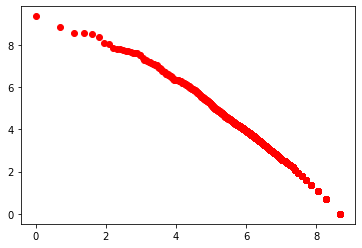

In [ ]:
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [ ]:
# generate x and y
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[-1.42315228]
 [12.45487147]]


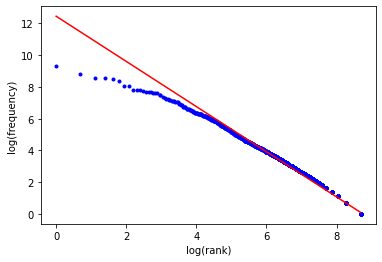

In [ ]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

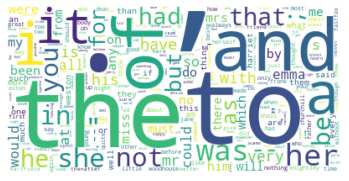

In [ ]:
wc= WordCloud(background_color="white", max_words= 1000)
wc.generate_from_frequencies(freq_dict) # Generate the word cloud
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

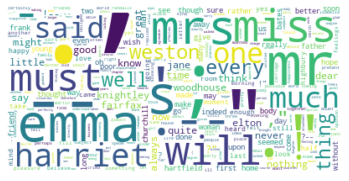

In [ ]:
# Remove the stop words and agian show in the word cloud

stopwords= set(STOPWORDS)
freq_dict_ ={}
for w,c in counts:
  if w not in stopwords:
    freq_dict_[w]=c

wc= WordCloud(background_color="white", max_words= 1000)
wc.generate_from_frequencies(freq_dict_) # Generate the word cloud
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()